# 품목별 소비자물가지수 동향 분석
- 분야 : 공업제품
- 자료 출처
    - 품목별_소비자물가지수_품목성질별_공업제품 (https://kostat.go.kr/incomeNcpi/cpi/cpi_td/2/1/index.action?bmode=cpidtval)
    - 원유가격현황 (http://investing.com)
    - 코로나바이러스감염증-19_확진환자_발생현황 (http://ncov.mohw.go.kr/)
    - 국제 주요국 중앙은행 정책금리 (https://ecos.bok.or.kr/#/SearchStat)
    - 품목별_소비자물가지수_석유류 (https://kostat.go.kr/incomeNcpi/cpi/cpi_td/2/1/index.action?bmode=cpidtval)

## 데이터 전처리

In [415]:
# 모듈 로딩
import pandas as pd
import csv
import matplotlib.pyplot as plt
import platform
import datetime
import numpy as np

# DF 생성
cpi_df=pd.read_csv('품목별_소비자물가지수_품목성질별_공업제품.csv', encoding = 'euc_kr')
wti_df=pd.read_csv('원유가격현황.csv', encoding = 'utf-8')
corona_df=pd.read_excel('코로나바이러스감염증-19_확진환자_발생현황.xlsx', header=4)
oil_df=pd.read_csv('품목별_소비자물가지수_석유류.csv', encoding='euc_kr')

In [416]:
cpi_df=cpi_df.iloc[:8,1:]
cpi_df=cpi_df.T
cpi_df=cpi_df.reset_index()
cpi_df.rename(columns=cpi_df.iloc[0],inplace=True)
cpi_df=cpi_df.drop(index=[0], columns='공업제품')
cpi_df['일자'] = cpi_df['일자'].astype('datetime64')
cpi_df.set_index('일자', inplace=True)
a=['가공식품', '내구재', '섬유제품', '출판물', '석유류', '의약품', '화장품']
cpi_df[a]=cpi_df[a].astype('int64')
cpi_df.tail(20)

,가공식품,내구재,섬유제품,출판물,석유류,의약품,화장품
일자,,,,,,,
2020-11-01,100,100,100,99,94,99,100
2020-12-01,100,100,100,100,97,99,101
2021-01-01,100,99,100,100,103,99,101
2021-02-01,100,99,100,100,105,100,101
2021-03-01,101,99,100,100,109,100,101
2021-04-01,101,99,100,100,111,100,103
2021-05-01,101,99,100,100,111,100,102
2021-06-01,101,99,100,100,113,100,101
2021-07-01,101,99,100,100,117,100,101


In [417]:
wti_df['날짜'] = wti_df['날짜'].astype('datetime64')
wti_df.rename(columns={'날짜':'일자','종가':'유가'}, inplace=True)
wti_df=wti_df.iloc[:,0:2]
wti_df.set_index('일자', inplace=True)
wti_df.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2022-06-19', '2022-06-20', '2022-06-21', '2022-06-22',
               '2022-06-23', '2022-06-24', '2022-06-27', '2022-06-28',
               '2022-06-29', '2022-06-30'],
              dtype='datetime64[ns]', name='일자', length=923, freq=None)

In [418]:
corona_df=corona_df.replace('-',0)
corona_df=corona_df.drop([0])
corona_df['일자']=corona_df['일자'].astype('datetime64')
corona_df['확진자 수']=corona_df['계(명)']+corona_df['사망(명)']
corona_df=corona_df.iloc[:893,[0,5]]
corona_df.set_index('일자', inplace=True)

# 코로나 확진자 수 정규화
corona_df['확진자 수']=np.log10(corona_df['확진자 수'])
corona_df

c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,확진자 수
일자,
2020-01-20,0.000000
2020-01-21,-inf
2020-01-22,-inf
2020-01-23,-inf
2020-01-24,0.000000
...,...
2022-06-26,3.795463
2022-06-27,3.534787
2022-06-28,3.995591


In [419]:
oil_df=oil_df.iloc[:8,1:]
oil_df=oil_df.T
oil_df=oil_df.reset_index()
oil_df.rename(columns=oil_df.iloc[0],inplace=True)
oil_df=oil_df.drop(oil_df.index[0])
oil_df['일자'] = oil_df['일자'].astype('datetime64')
oil_df.set_index('일자', inplace=True)
oil_df

,취사용LPG,등유,부탄가스,휘발유,경유,자동차용LPG
일자,,,,,,
2019-01-01,100.44,109.638,102.276,98.056,104.995,101.296
2019-02-01,100.527,108.996,101.807,97.171,104.1,100.888
2019-03-01,100.354,109.638,94.889,98.514,105.715,100.755
2019-04-01,100.479,110.9,102.172,102.576,109.885,100.643
2019-05-01,103.673,112.528,98.322,109.214,115.713,106.826
2019-06-01,104.038,112.771,102.266,110.197,116.215,107.785
2019-07-01,99.978,112.162,102.057,107.729,113.399,101.071
2019-08-01,99.468,112.007,96.861,107.915,113.334,99.622
2019-09-01,98.699,112.052,103.121,110.393,115.56,99.092


In [420]:
ppi_df=ppi_df.T
ppi_df=ppi_df.reset_index()
ppi_df.rename(columns=ppi_df.iloc[0],inplace=True)
ppi_df=ppi_df.drop(ppi_df.index[0])
ppi_df.columns
ppi_df['일자']=ppi_df['Unnamed: 0'].str[:6]
ppi_df['일자']=pd.to_datetime(ppi_df['일자'],format='%Y%m')
ppi_df=ppi_df.drop(columns=['Unnamed: 0'])
ppi_df.set_index('일자', inplace=True)
ppi_df=ppi_df+100
ppi_df

KeyError: 'Unnamed: 0'

<AxesSubplot:xlabel='일자'>

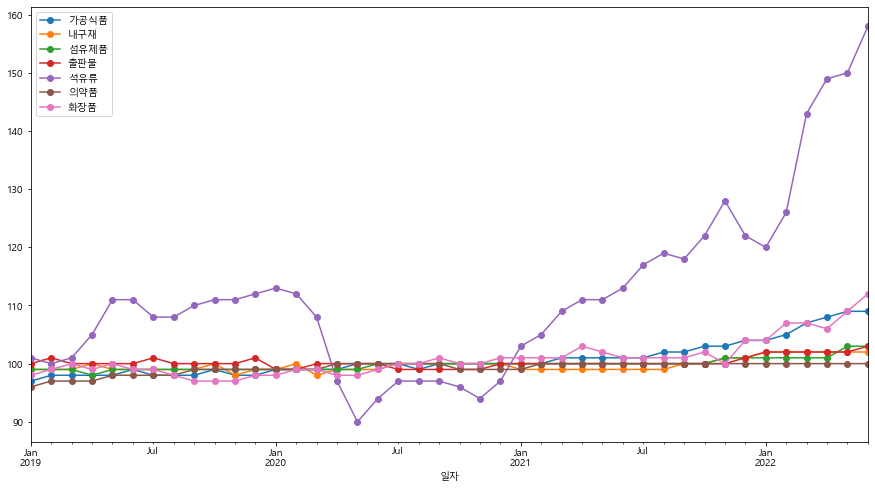

In [ ]:
# 운영체제별 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family = 'Malgun Gothic')
else:
    plt.rc('font', family = 'AppleGothic')

cpi_df.plot(figsize=(15,8), marker='o')

In [ ]:
# 일 기준 => 월 기준으로 변환
wti_Mdf = wti_df.resample(rule='MS').first()
corona_Mdf = corona_df.resample(rule='MS').first()

## 데이터 시각화

### 공업제품 분야 소비자 물가지수와 유가 및 코로나 간의 상관관계

In [ ]:
df3=cpi_df.merge(wti_Mdf,on='일자',how='outer').merge(corona_Mdf,on='일자',how='outer')
corr_df=df3.corr()
corr_df=corr_df.iloc[0:7,7:9]
corr_df

,유가,확진자 수
가공식품,0.800139,0.844849
내구재,0.666587,0.647867
섬유제품,0.693718,0.736166
출판물,0.746096,0.815739
석유류,0.951129,0.754879
의약품,0.242860,0.428812
화장품,0.792046,0.801051


In [ ]:
corr_df=corr_df.iloc[[0,4,6]]
corr_df

,유가,확진자 수
가공식품,0.800139,0.844849
석유류,0.951129,0.754879
화장품,0.792046,0.801051


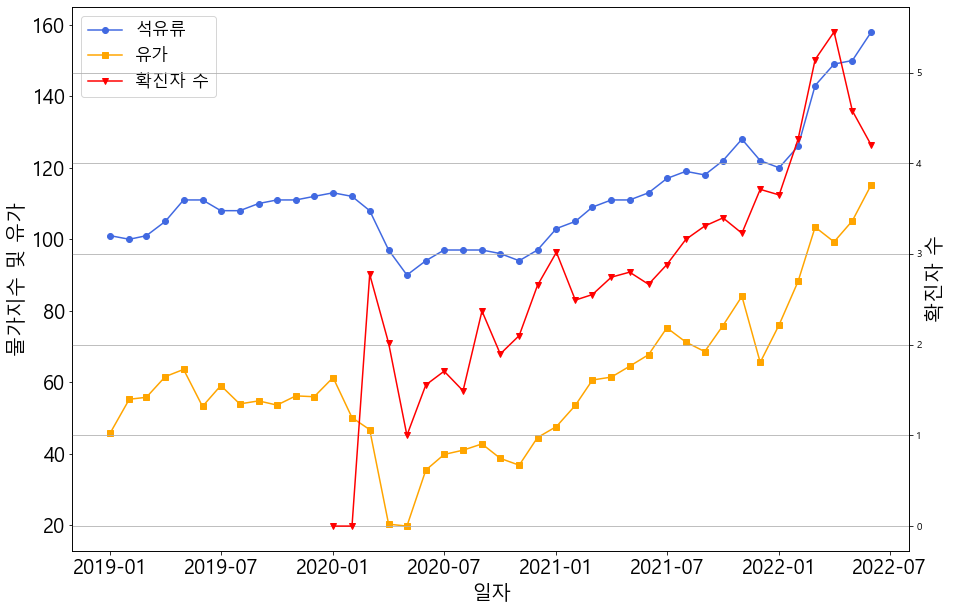

In [ ]:
if platform.system() == 'Windows':
    plt.rc('font', family = 'Malgun Gothic')
else:
    plt.rc('font', family = 'AppleGothic')
    
df=cpi_df.merge(wti_Mdf,on='일자',how='outer')

fig, ax1 = plt.subplots(figsize=(15,10))
line1=ax1.plot(df.index,df['석유류'], color='royalblue', marker='o', label='석유류')
line2=ax1.plot(df.index,df['유가'], color='orange', marker='s', label='유가')

ax1.set_xlabel('일자', fontsize=20)
ax1.set_ylabel('물가지수 및 유가', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# ax2는 y2에 대한 그래프, twinx로 x축을 공유
ax2 = ax1.twinx()
line3=ax2.plot(corona_Mdf, color = 'red', marker='v', label='확진자 수')

lines=line1+line2+line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=17)

ax2.set_ylabel('확진자 수', fontsize=20)

plt.grid(True)
plt.show()

### 석유류 품목 물가지수와 유가, 코로나 확진자 수 간에 관계 분석
- 석유류의 물가지수는 유가에 가장 큰 영향을 받으므로 유가 추세와 동일하게 나타남
- 2020년 3월 사우디-러시아발 유가 대폭락으로 석유류 물가지수도 10% 가량 떨어짐
- 2022년 2월 24일 러시아의 우크라이나 침공으로 인해 미국은 대러시아 제재를 실시하여 러시아산 석유의 금수 조치를 취함
- 이로 인해 석유의 공급은 축소되었으나 오미크론 변이 발생 이후 엔데믹이 될거란 기대감과 함께 수요 증가가 맞물려 유가 상승하며 석유류 물가지수도 함께 상승함
- 정부의 사회적 거리두기로 인해 확진자 수가 줄었으나 집에만 머물며 이동이 줄어들어 원유가 남아돌게 됨
- 이로 인해 유가 하락 및 석유류 물가지수도 하락하는 추세를 보임

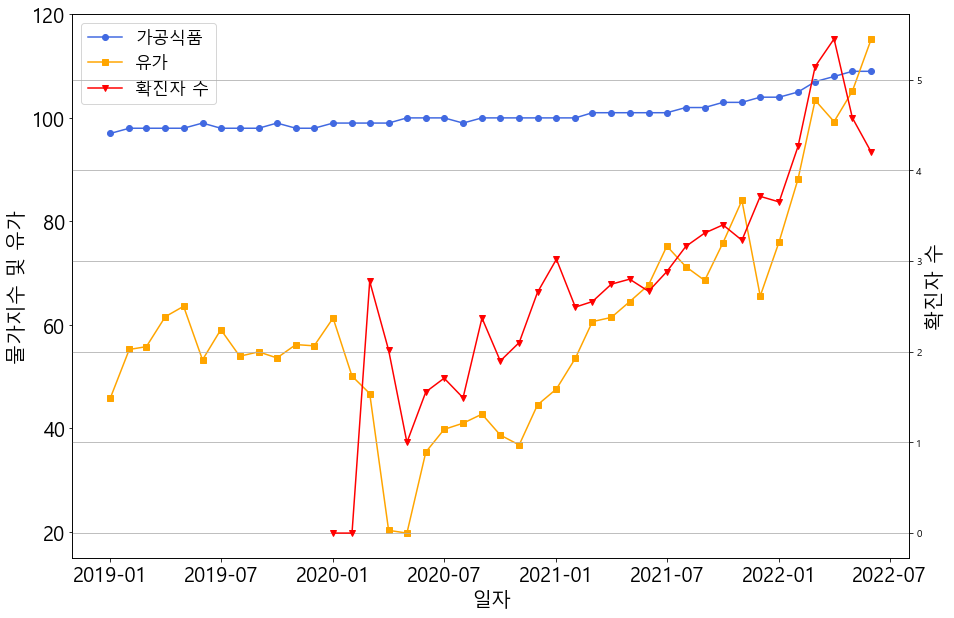

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,10))
line1=ax1.plot(df.index,df['가공식품'], color='royalblue', marker='o', label='가공식품')
line2=ax1.plot(df.index,df['유가'], color='orange', marker='s', label='유가')

ax1.set_xlabel('일자', fontsize=20)
ax1.set_ylabel('물가지수 및 유가', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# ax2는 y2에 대한 그래프, twinx로 x축을 공유
ax2 = ax1.twinx()
line3=ax2.plot(corona_Mdf, color = 'red', marker='v', label='확진자 수')

lines=line1+line2+line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=17)

ax2.set_ylabel('확진자 수', fontsize=20)

plt.grid(True)
plt.show()

### 가공식품 품목 소비자 물가지수와 유가 및 코로나 간의 관계 분석
- 가공식품은 석유류에 비해 물가지수가 적은 폭으로 상승하였으나 공업제품 특성상 유가에 영향을 받는 것으로 보임
- 최근 유가가 급증하면서 가공식품의 물가지수 또한 10% 가량 상승함

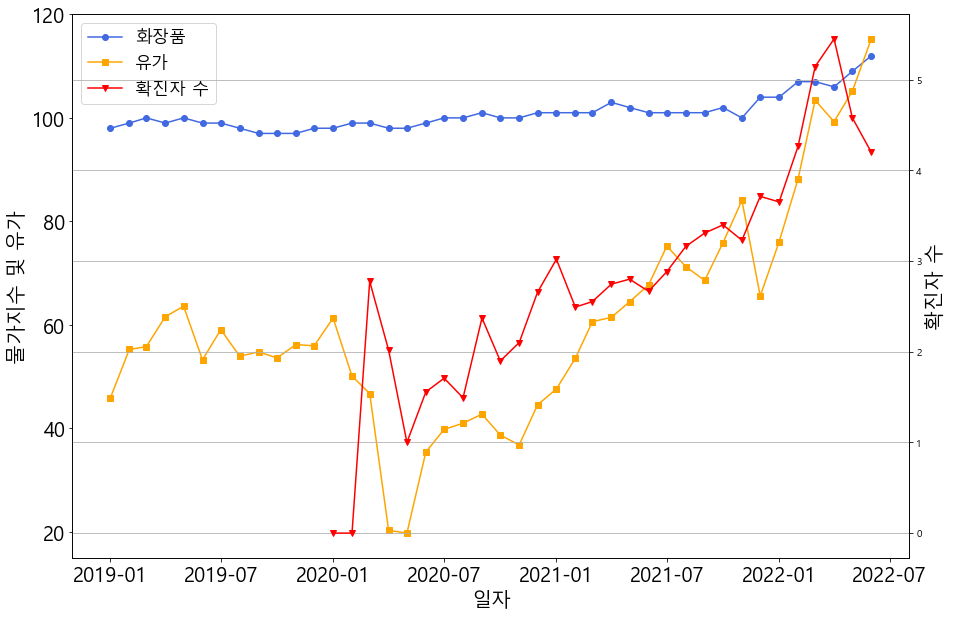

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,10))
line1=ax1.plot(df.index,df['화장품'], color='royalblue', marker='o', label='화장품')
line2=ax1.plot(df.index,df['유가'], color='orange', marker='s', label='유가')

ax1.set_xlabel('일자', fontsize=20)
ax1.set_ylabel('물가지수 및 유가', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# ax2는 y2에 대한 그래프, twinx로 x축을 공유
ax2 = ax1.twinx()
line3=ax2.plot(corona_Mdf, color = 'red', marker='v', label='확진자 수')

lines=line1+line2+line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=17)

ax2.set_ylabel('확진자 수', fontsize=20)

plt.grid(True)
plt.show()

### 화장품 품목 소비자 물가지수와 유가 및 코로나 간의 관계 분석
- 화장품은 석유류에 비해 물가지수가 적은 폭으로 상승하였으나 화장품의 원료가 석유이기 때문에 유가에 영향을 받는 것으로 보임
- 최근 유가가 급증하면서 화장품의 물가지수 또한 10% 가량 상승함

### 최종 결과
- 석유류는 원재료가 원유인 특성 상 유가에 영향을 많이 받음
- 공장에서 생산되는 공업제품 특성 상 가공식품과 화장품은 유가에 영향을 많이 받음